In [146]:
import eikon as ek
ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
instruments = ["SBRY.L"]
fields = ["TR.F.TotRevBizActiv(SDate=0,EDate=-19,Period=FY0,Frq=FY,Scale=6)", "TR.F.TotRevBizActiv(SDate=0,EDate=-19,Period=FY0,Frq=FY,Scale=6).date"]
df, err = ek.get_data(instruments, fields)
df

,Instrument,Revenue from Business Activities - Total,Date
0,SBRY.L,29895,2022-03-05T00:00:00Z
1,SBRY.L,29048,2021-03-06T00:00:00Z
2,SBRY.L,28993,2020-03-07T00:00:00Z
3,SBRY.L,29007,2019-03-09T00:00:00Z
4,SBRY.L,28456,2018-03-10T00:00:00Z
5,SBRY.L,26224,2017-03-11T00:00:00Z
6,SBRY.L,23506,2016-03-12T00:00:00Z
7,SBRY.L,23775,2015-03-14T00:00:00Z
8,SBRY.L,23949,2014-03-15T00:00:00Z
9,SBRY.L,23303,2013-03-16T00:00:00Z


In [149]:
df = df.rename(columns={"Revenue from Business Activities - Total": "Revenue"})

In [150]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%dT%H:%M:%SZ')

In [151]:
df["Year"] = df["Date"].dt.year

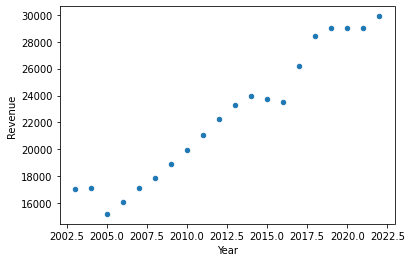

In [152]:
ax = df.plot.scatter(x="Year",
               y="Revenue")

Now implement the simple linear regression. We have different packages for this. Here we use `statsmodels.formula.api` for this

In [153]:
import statsmodels.formula.api as smf

In [154]:
df.dtypes

Instrument            string
Revenue                Int64
Date          datetime64[ns]
Year                   int64
dtype: object

Looking at the dtypes in this dataframe above, we can see that Revenue data type is _Int64_, and this data type cannot be recognised by ols algorithm. We need to change it to _int64_ instead:

In [155]:
df["Revenue"] = df["Revenue"].astype(int)

In [156]:
reg1 = smf.ols(formula="Revenue ~ Year", data=df).fit()

In [157]:
Y_pred = reg1.predict()

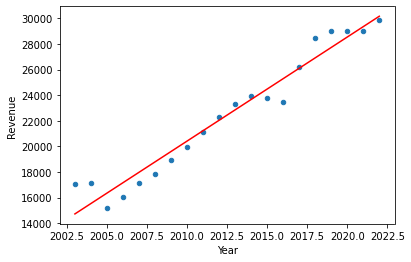

In [158]:
ax = df.plot.scatter(x="Year",
               y="Revenue")
plt.plot(df["Year"], Y_pred, color='red', label='Regression')

Let's have a look at the model parameters:

In [159]:
reg1.params

Intercept   -1.614329e+06
Year         8.133038e+02
dtype: float64

We can also print the summary of this regression. Note that we only have 5 samples, not enough data to conduct all the relevant tests and we have a warning message.  

In [160]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     370.9
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.85e-13
Time:                        21:59:06   Log-Likelihood:                -167.18
No. Observations:                  20   AIC:                             338.4
Df Residuals:                      18   BIC:                             340.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.614e+06    8.5e+04    -18.996      0.000   -1.79e+06   -1.44e+06
Year         813.3038     42.228     19.260      0.000     724.586     902.022
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.158
Skew:                           0.568   Prob(JB):                        0.560
Kurtosis:                       2.686   Cond. No.                     7.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key results:
- __R-squared__ is also called the coefficient of determination. It’s a statistical measure of how well the regression line fits the data.
- __Adjusted R-squared__ actually adjusts the statistics based on the number of independent variables present.
- The ratio of deviation of the estimated value of a parameter from its hypothesized value to its standard error is called __t-statistic__.
- __F-statistic__ is calculated as the ratio of mean squared error of the model and mean squared error of residuals.
- __AIC__ stands for Akaike Information Criterion, which estimates the relative quality of statistical models for a given dataset.
- __BIC__ stands for Bayesian Information Criterion, which is used as a criterion for model selection among a finite set of models. BIC is like AIC, however it adds a higher penalty for models with more parameters.

Now we can predict the result in 2021.

In [161]:
reg1.predict(pd.DataFrame({'Year': [2021, 2022, 2023]}))

0    29357.981955
1    30171.285714
2    30984.589474
dtype: float64

In [162]:
from datetime import date
Tesco = ek.get_timeseries("TSCO.L", "CLOSE", "2016-03-01", date.today().strftime("%Y-%m-%d"), 'monthly')
FTSE = ek.get_timeseries(".FTSE", "CLOSE", "2016-03-01", date.today().strftime("%Y-%m-%d"), "monthly")

In [163]:
monthly_prices = pd.concat([Tesco['CLOSE'], FTSE['CLOSE']], axis=1)
monthly_prices.head()

,CLOSE,CLOSE
Date,,
2016-03-31,191.52001,6174.9
2016-04-30,171.848768,6241.89
2016-05-31,164.858986,6230.79
2016-06-30,174.64468,6504.33
2016-07-31,155.772271,6724.43


In [164]:
monthly_prices.columns = ['Tesco', 'FTSE']

In [165]:
monthly_returns = monthly_prices.pct_change()

In [166]:
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row

In [167]:
clean_monthly_returns.head()

,Tesco,FTSE
Date,,
2016-04-30,-0.102711,0.010849
2016-05-31,-0.040674,-0.001778
2016-06-30,0.059358,0.043901
2016-07-31,-0.108062,0.033839
2016-08-31,0.066346,0.008488


In [168]:
reg2 = smf.ols(formula="Tesco ~ FTSE", data=clean_monthly_returns).fit()

TypeError: Cannot interpret 'Float64Dtype()' as a data type

In [ ]:
reg2.summary()

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf



## Data

First, the importing and preparation of the data set. The Figure created below shows the frequency distribution of the daily historical log returns for the EUR/USD exchange rate. They
are the basis for the features as well as the labels to be used in what follows:

In [170]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [171]:
symbol = 'EUR='

In [172]:
data = pd.DataFrame(raw[symbol])

In [173]:
data['returns'] = np.log(data / data.shift(1))

In [174]:
data.dropna(inplace=True)

In [175]:
# If return is positive, then direction is 1; otherwise, -1
data['direction'] = np.sign(data['returns']).astype(int)

In [176]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


<AxesSubplot:>

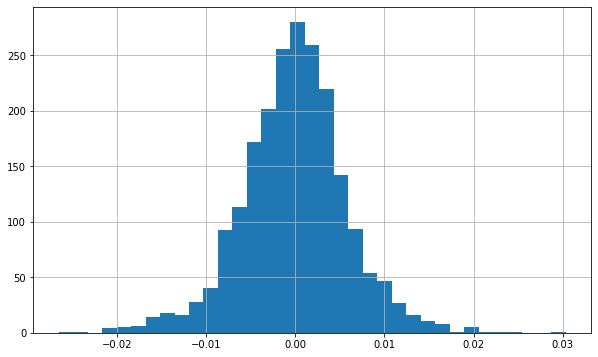

In [177]:
data['returns'].hist(bins=35, figsize=(10, 6))

Second, the following code creates the features data by lagging the log returns and visualizes it in combination with the returns data:

In [178]:
data['lag_1'] = data['returns'].shift(1)
data['lag_2'] = data['returns'].shift(2)

In [179]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [180]:
data.dropna(inplace=True)

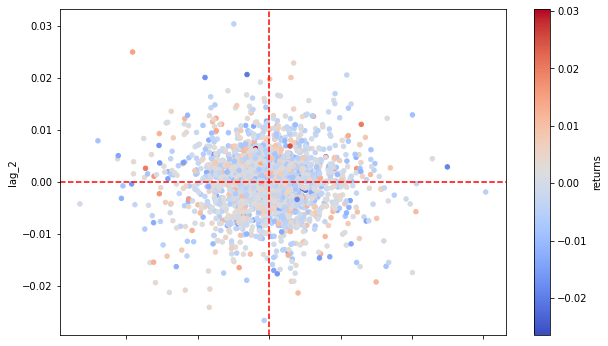

In [181]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

## Regression

With the data set completed, linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movement based on the features,
and to backtest a trading strategy based on the predictions. Two basic approaches are available: using the log returns or only the direction data as the dependent variable
during the regression. In any case, predictions are real-valued and therefore transformed to either +1 or -1 to only work with the direction of the prediction.

In [182]:
# The regression is implemented on the log returns directly 
reg3 = smf.ols(formula="returns ~ lag_1 + lag_2", data=data).fit()
data['pos_ols_1'] = reg3.predict()

In [183]:
# The regression is implemented on the direction data which is of primary interest.
reg4 = smf.ols(formula="direction ~ lag_1 + lag_2", data=data).fit()
data['pos_ols_2'] = reg4.predict()

In [184]:
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000166,-0.000086
2010-01-08,0.000017,0.040404
2010-01-11,-0.000244,-0.011756
2010-01-12,-0.000139,-0.043398
2010-01-13,-0.000022,0.002237


The real-valued predictions are transformed to directional values (+1, -1). 

In [185]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

The two approaches yield different directional predictions in general:

In [186]:
data['pos_ols_1'].value_counts()

-1    1847
 1     288
Name: pos_ols_1, dtype: int64

In [187]:
data['pos_ols_2'].value_counts()

 1    1377
-1     758
Name: pos_ols_2, dtype: int64

Equipped with the directional prediction, vectorized backtesting can be applied to
judge the performance of the resulting trading strategies. At this stage, the analysis is
based on a number of simplifying assumptions, such as “zero transaction costs” and
the usage of the same data set for both training and testing. Under these assumptions,
however, both regression-based strategies outperform the benchmark passive investment, while only the strategy trained on the direction of the market shows a positive overall performance:

In [188]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']

In [189]:
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

In [190]:
np.exp(data[['returns', 'strat_ols_1', 'strat_ols_2']].sum())

returns        0.810644
strat_ols_1    0.942422
strat_ols_2    1.339286
dtype: float64

In [191]:
# Shows the number of correct and false predictions by the strategies.
(data['direction'] == data['pos_ols_1']).value_counts()

False    1093
True     1042
dtype: int64

In [192]:
(data['direction'] == data['pos_ols_2']).value_counts()

True     1096
False    1039
dtype: int64

<AxesSubplot:xlabel='Date'>

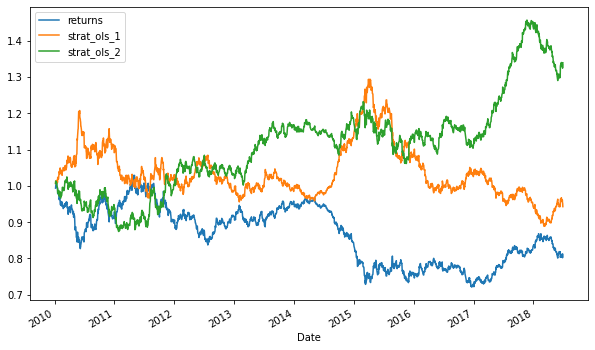

In [193]:
np.exp(data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum()).plot(figsize=(10, 6))